# <p style="padding: 15px; background-color: #0066CC; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 125%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">House Price Prediction</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#202020; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>Competition Description</b>
</p>


<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. </br></br>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
</p>


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color:#f2f2f0;
">
    <b>Goal</b> 
</p>


<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 
</p>


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color:#f2f2f0;
">
    <b>Metric</b> 
</p>


<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)
</p>


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>This Notebook Covers</b> 
</p>

<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-bottom: 20px;
">
    <li>A quick look at the dataset.</li>
    <li>Heatmap and correlations</li>
    <li>Pivot tables</li>
    <li>Fancy pie charts</li>
    <li>Feature importances</li>
    <li>Model comparison</li>
    <li>Best model tuning and submission</li>
</ul>

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>See More Here</b> 
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques" style="color: #99CCFF;"><b>House Price Prediction</b></a>
</p>
</blockquote>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from colorama import Fore, Style
from IPython.display import display_html
from textwrap import wrap
from matplotlib.gridspec import GridSpec
from pandas.api.types import is_numeric_dtype, is_object_dtype
from scipy.stats import percentileofscore
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr
from scipy.stats import probplot



White_Black = False
DARK_BLUE = "#141b4d"
CLR = (Fore.BLACK) if White_Black else (Style.BRIGHT + Fore.WHITE)
DF_CMAP = sns.light_palette("#252131", as_cmap=True)
RED = Style.BRIGHT + Fore.RED


MY_RC = {
    "axes.labelcolor": DARK_BLUE,
    "axes.labelsize": 10,
    "axes.labelpad": 15,
    "axes.labelweight": "bold",
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "xtick.labelsize": 10,
    "xtick.color": DARK_BLUE,
    "ytick.labelsize": 10,
    "ytick.color": DARK_BLUE,
    "figure.titlesize": 14,
    "figure.titleweight": "bold",
    "figure.dpi": 72,  # Locally Seaborn uses 72, meanwhile Kaggle 96.
    "font.size": 10,
    "font.family": "Serif",
    "text.color": DARK_BLUE,
}

sns.set_theme(rc=MY_RC)

# <p style="padding: 15px; background-color: #0066CC; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 100%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Train and Test</p>

<p style="
    font-size: 20px;
    font-weight: bold;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #004C99;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#202020; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>In this section, we'll look over the dataset in a general manner, we'll see which attributes are available, which are categorical and numerical, and whether there are any missing values.</li>
    <li>We also glance at features description.</li>
</ul>
</blockquote>


In [2]:
train_set = pd.read_csv('Data/train.csv')
test_set = pd.read_csv('Data/test.csv')

# pd.options.display.max_columns = train_set.shape[1]
display(train_set.head(), test_set.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
train_set.shape, test_set.shape

((1460, 81), (1459, 80))

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<p style="
    font-size: 20px;
    font-weight: bold;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #004C99;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#202020; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>Okay, so we have a 50/50 split ratio here.</li>
    <li>Firstly, let's have a look at categorical and numerical features.</li>
</ul>
</blockquote>


In [5]:
train_cats = train_set.select_dtypes(include="object")
train_nums = train_set.select_dtypes(include="number")

cat_cols = train_cats.columns
num_cols = train_nums.columns

assert train_cats.shape[1] + train_nums.shape[1] == train_set.shape[1]

display(train_cats.head(), train_nums.head())
print(f"{CLR}CAT:", f"{list(cat_cols)}")
print(f"{CLR}NUM:", f"{list(num_cols)}")

print(
      '',
    f"{CLR}Number of categorical features: {len(cat_cols)}",
    f"{CLR}Number of numerical features: {len(num_cols)}",
    sep="\n",
)



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


CAT: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
NUM: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenP

In [6]:
train_nans = (
    train_set.isna()
    .sum()[train_set.isna().sum() > 0]
    .to_frame(name="Train Missing Values")
    .style.background_gradient(DF_CMAP)
    .set_table_attributes("style='display:inline'")
)

test_nans = (
    test_set.isna()
    .sum()[test_set.isna().sum() > 0]
    .to_frame(name="Test Missing Values")
    .style.background_gradient(DF_CMAP)
    .set_table_attributes("style='display:inline'")
)

display_html(test_nans._repr_html_() + train_nans._repr_html_(), raw=True)

,Test Missing Values
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,16
MasVnrArea,15
BsmtQual,44
BsmtCond,45


<p style="
    font-size: 20px;
    font-weight: bold;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #004C99;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#202020; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>In the train set we have a lots of missing values.</li>
    <li>In the test set it is a little bit worse than in the train set</li>
</ul>
</blockquote>


# <p style="padding: 15px; background-color: #0066CC; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 100%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Exploratory Data Analysis</p>

## <b><span style="padding:15px; background-color:#0066CC; font-family: 'JetBrains Mono' ; font-weight: normal; color:#f2f2f0; border-radius: 10px 10px;"> 1. HANDLE WITH CATEGORICAL FEATURES </span></b>

<p style="
    font-size: 20px;
    font-weight: bold;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #004C99;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#202020; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <p>We have a lot of features in this dataset. It would be good to have some nice tool to take a look at the categories first. To do this, we will write a class <code>CategoricalFeatureHandler</code>, which helps us a little. The main task of this class will be to present relationships between a given categorical feature and the chosen numerical one. The most important for us is obviously <code>SalePrice</code>, so we will compare each categorical one with that.</p>
</ul>
</blockquote>


In [7]:
class CategoricalFeatureHandler:
    """Provides a piece of information about the categorical feature
    in a more pleasant manner. See `create_categories_info()` and
    `categories_info_plot()` methods."""

    def __init__(self, dataset):
        """Initialize the handler by copying the original `dataset`."""
        self.df = dataset.copy()

    def create_categories_info(self, cat_feature, num_feature):
        """Creates a new Data Frame with `cat_feature` categories
        with respect to `num_feature`"""
        df = self.df

        if not is_object_dtype(df[cat_feature]):
            raise TypeError("The `cat_feature` is not a `object` dtype.")
        if not is_numeric_dtype(df[num_feature]):
            raise TypeError("The `num_feature` is not a `numeric` dtype.")

        df[cat_feature].fillna("Missing", inplace=True)

        info_df = (
            df.groupby(cat_feature)
            .agg(
                Median=(num_feature, np.nanmedian),
                Mean=(num_feature, np.nanmean),
                RelMeanDiff=(
                    num_feature,
                    lambda x: (np.nanmean(x) - np.nanmedian(x)) / np.nanmedian(x) * 100
                    if np.nanmedian(x) > 0
                    else 0,
                ),
            )
            .add_prefix(f"{num_feature} ")
        )

        # What percentile of the whole `num_feature` constitutes
        # the calculated median / mean for a given category?
        for measure in ("Median", "Mean"):
            non_nan_values = df.loc[~df[num_feature].isna(), num_feature]
            info_df[f"{num_feature} {measure}Pctl."] = [
                percentileofscore(non_nan_values, score)
                for score in info_df[f"{num_feature} {measure}"]
            ]

        info_df["Counts"] = df[cat_feature].value_counts()
        info_df["Counts Ratio"] = df[cat_feature].value_counts(normalize=True)
        self.info_df = info_df
        self._provide_consistent_cols_order()

        return self.info_df.copy()

    def _provide_consistent_cols_order(self):
        """Adds private attributes to pass column names easily. Changes the
        column order in the `info_df` to be more precise. This operation is
        not required but simplifies navigation in `_draw_descriptive_stats()`."""
        (
            self._median_name,
            self._mean_name,
            self._rel_mean_diff_name,
            self._median_pctl_name,
            self._mean_pctl_name,
            self._counts_name,
            self._counts_ratio_name,
        ) = self.info_df.columns

        self.info_df = self.info_df[
            [
                self._counts_name,
                self._counts_ratio_name,
                self._median_name,
                self._median_pctl_name,
                self._mean_name,
                self._mean_pctl_name,
                self._rel_mean_diff_name,
            ]
        ]

        self._n_categories_in = self.info_df.shape[0]
        self._n_stats_in = self.info_df.shape[1]
        self._stat_names_in = self.info_df.columns

    def categories_info_plot(self, cat_feature, num_feature, palette="mako_r"):
        """Creates a new figure with bar plots and descriptive statistics.
        The figure height is scalable with a large number of categories."""
        self.create_categories_info(cat_feature, num_feature)

        fig_height = 8
        if self._n_categories_in > 5:
            fig_height += (self._n_categories_in - 5) * 0.5

        fig = plt.figure(figsize=(12, fig_height), tight_layout=True)
        sns.set_palette(palette, self._n_categories_in)
        plt.suptitle(
            f"{cat_feature} vs {self._counts_name} & {self._median_name} & {self._rel_mean_diff_name}"
        )
        gs = GridSpec(nrows=2, ncols=3, figure=fig)

        ax1 = fig.add_subplot(gs[0, 0])  # Counts.
        ax2 = fig.add_subplot(gs[0, 1])  # Median.
        ax3 = fig.add_subplot(gs[0, 2])  # Relative Mean Diff.
        ax4 = fig.add_subplot(gs[1, :])  # Descriptive Stats.

        for ax, stat_name in zip(
            (ax1, ax2, ax3),
            (self._counts_name, self._median_name, self._rel_mean_diff_name),
        ):
            self._plot_category_vs_stat_name(ax, stat_name)
            if not ax == ax1:
                plt.ylabel("")

        self._draw_descriptive_stats(ax4)
        sns.set_palette("deep")  # Default palette.

    def _plot_category_vs_stat_name(self, ax, stat_name):
        """Plots a simple barplot (`category` vs `stat_name`) in the current axis."""
        info_df = self.info_df
        order = info_df.sort_values(stat_name, ascending=False).index
        plt.sca(ax)
        plt.yticks(rotation=30)
        sns.barplot(data=info_df, x=stat_name, y=info_df.index, order=order)

    def _draw_descriptive_stats(self, ax4):
        """Draws info from the `info_df` at the bottom of the figure."""
        plt.sca(ax4)
        plt.ylabel("Descriptive Statistics", fontsize=12, weight="bold")
        plt.xticks([])
        plt.yticks([])

        # Spaces between rows and cols. Default axis has [0, 1], [0, 1] range,
        # thus we divide 1 by number of necessary rows / columns.
        xspace = 1 / (self._n_stats_in + 1)  # +1 due to one for a category.
        yspace = 1 / (self._n_categories_in + 1 + 1)  # +2 due to wide header.

        xpos = xspace / 2
        ypos = 1 - yspace
        wrapper = lambda text, width: "\n".join(line for line in wrap(text, width))

        for header in np.r_[["Category"], self._stat_names_in]:
            header = wrapper(header, 15)  # Wrap headers longer than 15 characters.
            plt.text(xpos, ypos, header, ha="center", va="center", weight="bold")
            xpos += xspace

        """Provide formatting for the stats section. The `itertuples()` method iterates over 
        DataFrame rows as named tuples, so each row (tuple) contains one element from 
        each column. We can unpack this tuple in the `format()` method using *args syntax. 
        Therefore each component will be formatted with the defined pattern. Nevertheless,
        values compose one string. Thus we use the `split()` method later. This way, we can 
        easily plot info from the data frame using a fancy format. The only drawback is that 
        you must know the order of the columns."""

        pattern = "{};{};{:.2%};{:,.1f};{:.0f};{:,.1f};{:.0f};{:+.2f}"
        category_stats = [pattern.format(*row) for row in self.info_df.itertuples()]

        for i, cat_stats in enumerate(category_stats):
            ypos = 1 - (5 / 2 + i) * yspace
            plt.axhline(ypos + yspace / 2, color="white", linewidth=5)
            for j, cat_stat in enumerate(cat_stats.split(";")):
                xpos = (1 / 2 + j) * xspace
                plt.text(xpos, ypos, cat_stat, ha="center", va="center")


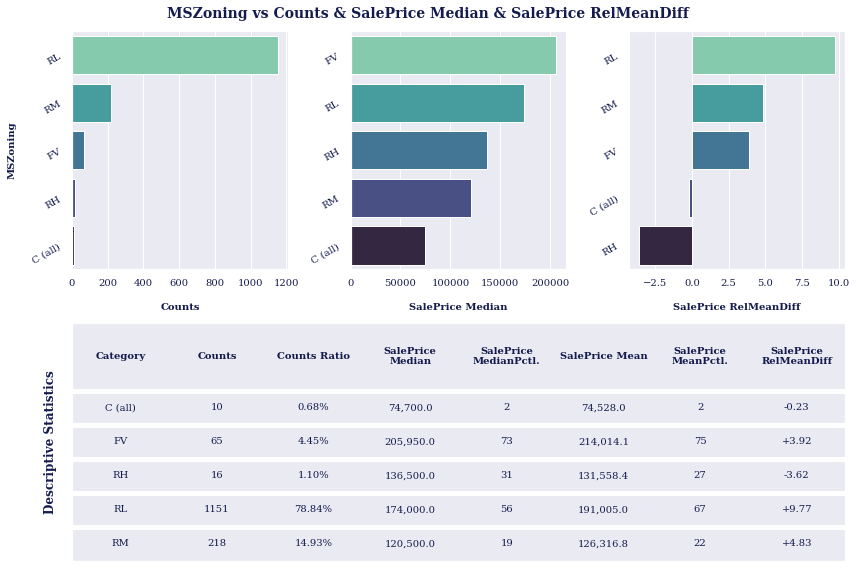

In [8]:
category_handler = CategoricalFeatureHandler(train_set)
category_handler.categories_info_plot("MSZoning", "SalePrice")


<p style="
    font-size: 20px;
    font-weight: bold;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #004C99;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#202020; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <p style="font-family: verdana; font-weight: bold; font-size: 14px">Thus, in <code>MSZoning</code>, we have five categories <code>C (all)</code>, <code>FV</code>, <code>RH</code>, <code>RL</code>, and <code>RM</code>. I think there is no need to explain the counts and counts ratio. Let's take a look at the <code>SalePriceMedian</code> column. For example median of house prices that have the <code>RM</code> category equals 120,500. This median price is the 19th percentile of all prices in the dataset, which means that probably houses in the <i>Residential Medium Density</i> zone (RM) are cheaper than in the overall. In a similar way <code>SalePriceMean</code> and <code>SalePriceMeanPctl.</code> columns work. We have the </code>SalePriceRelMeanDiff</code> column yet. The relative mean difference is defined as</p>
</ul>
</blockquote>

$$\textrm{RelMeanDiff} = \frac{\textrm{Mean} - \textrm{Median}}{\textrm{Median}} * 100.$$

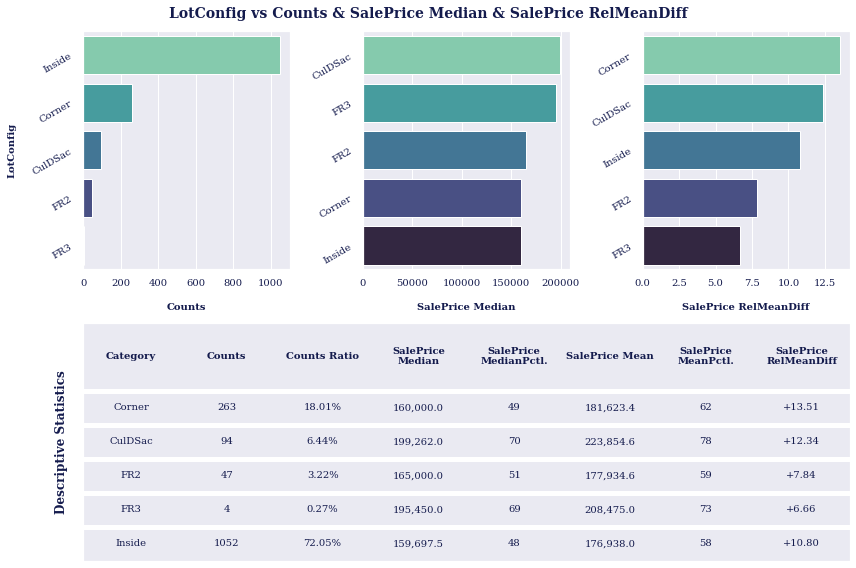

In [9]:
category_handler = CategoricalFeatureHandler(train_set)
category_handler.categories_info_plot("LotConfig", "SalePrice")

## <b><span style="padding:15px; background-color:#0066CC; font-family: 'JetBrains Mono' ; font-weight: normal; color:#f2f2f0; border-radius: 10px 10px;"> 2. HANDLE WITH NUMERICAL FEATURES </span></b>

In [10]:
train_nums.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [11]:
np.log1p(train_nums).describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,6.294307,0.975566,0.693147,5.904680,6.595097,6.999650,7.286876
MSSubClass,1460.0,3.818794,0.688354,3.044522,3.044522,3.931826,4.262680,5.252273
LotFrontage,1201.0,4.207109,0.346228,3.091042,4.094345,4.248495,4.394449,5.749393
LotArea,1460.0,9.110966,0.517369,7.170888,8.929898,9.156887,9.358976,12.279537
OverallQual,1460.0,1.940309,0.201983,0.693147,1.791759,1.945910,2.079442,2.397895
OverallCond,1460.0,1.869266,0.168400,0.693147,1.791759,1.791759,1.945910,2.302585
YearBuilt,1460.0,7.586821,0.015389,7.535297,7.578145,7.587817,7.601402,7.606387
YearRemodAdd,1460.0,7.593756,0.010424,7.576097,7.584773,7.598399,7.603399,7.606387
MasVnrArea,1452.0,2.131946,2.631265,0.000000,0.000000,0.000000,5.117994,7.378384
BsmtFinSF1,1460.0,4.229731,2.992052,0.000000,0.000000,5.951943,6.569832,8.638525


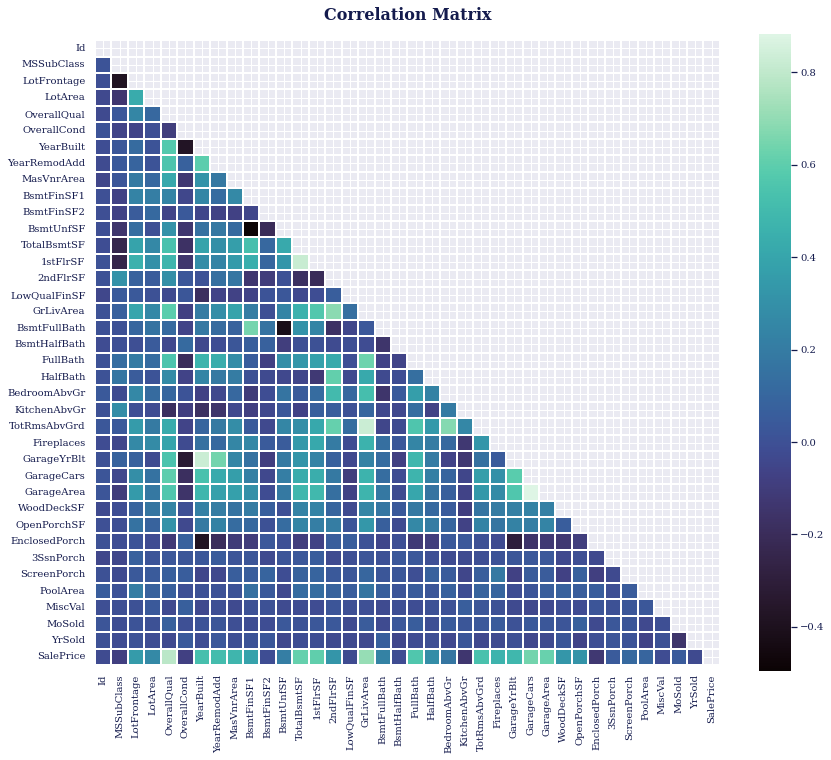

In [12]:
corr = train_set.corr(numeric_only=True)
# This correlation matrix is huge, so we take only a triangular one.
triu_mask = np.triu(corr)

plt.figure(figsize=(14, 14))
sns.heatmap(
    corr,
    square=True,
    linewidths=2,
    annot=False,
    mask=triu_mask,  # Lower triangle.
    cbar_kws={"shrink": 0.82},
    cmap="mako",
)
plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.show()

<p style="
    font-size: 20px;
    font-weight: bold;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #004C99;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#202020; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <p style="font-family: verdana; font-weight: bold; font-size: 14px">So we can see several interesting relations here. For example it seems that <code>TotRmsAbvGrd</code> and <code>GrLivArea</code> are strongly correlated. The next are <code>GarageYrBlt</code> vs <code>YearBuilt</code>, <code>1stFlrSF</code> vs <code>TotalBsmtSF</code> and <code>GarageArea</code> vs <code>GarageCars</code>. When we take a while to think, these relations are obvious, maybe not with <code>1stFlrSF</code> vs <code>TotalBsmtSF</code> only. Let's have a look at how high these correlations actually are.</p>
</ul>
</blockquote>

In [13]:
# The `:<` expression means built-in f-string `ljust()` method.
print(
    f"{CLR}{'TotRmsAbvGrd vs GrLivArea:':<25}",
    f"{RED}{corr.loc['TotRmsAbvGrd', 'GrLivArea']:.5f}",
)
print(
    f"{CLR}{'GarageYrBlt vs YearBuilt:':<25}",
    f"{RED}{corr.loc['GarageYrBlt', 'YearBuilt']:.5f}",
)
print(
    f"{CLR}{'1stFlrSF vs TotalBsmtSF:':<25}",
    f"{RED}{corr.loc['1stFlrSF', 'TotalBsmtSF']:.5f}",
)
print(
    f"{CLR}{'GarageArea vs GarageCars:':<25}",
    f"{RED}{corr.loc['GarageArea', 'GarageCars']:.5f}",
)


TotRmsAbvGrd vs GrLivArea: 0.82549
GarageYrBlt vs YearBuilt: 0.82567
1stFlrSF vs TotalBsmtSF:  0.81953
GarageArea vs GarageCars: 0.88248


In [14]:
corr["SalePrice"].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

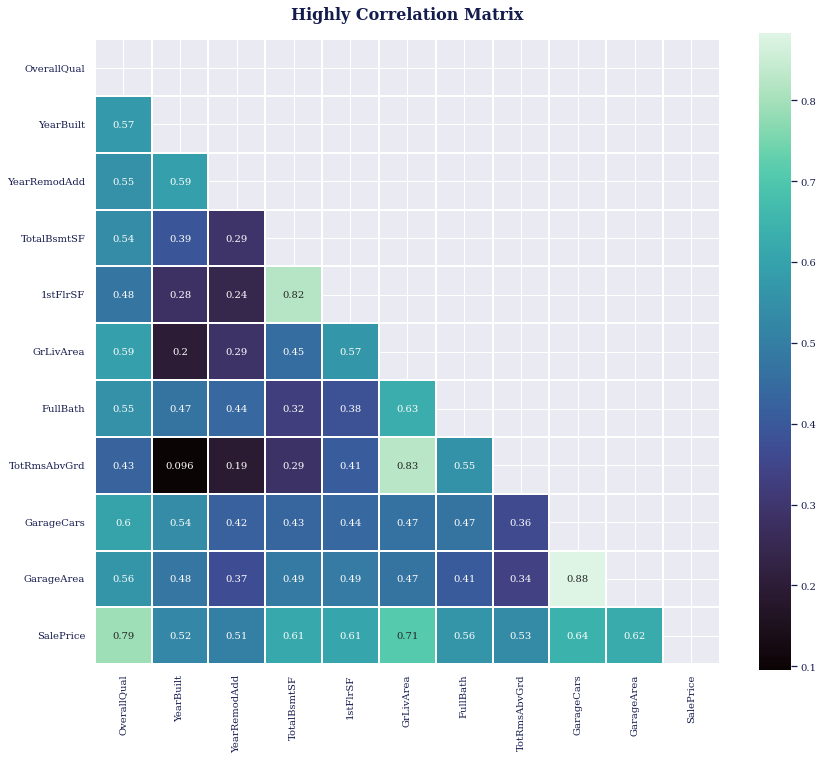

In [15]:
high_corr_cols = corr.loc[corr["SalePrice"] >= 0.5, "SalePrice"].index
high_corr = train_set[high_corr_cols].corr()
high_triu_mask = np.triu(high_corr)

plt.figure(figsize=(14, 14))
sns.heatmap(
    high_corr,
    square=True,
    linewidths=2,
    annot=True,
    mask=high_triu_mask,  # Lower triangle.
    cbar_kws={"shrink": 0.82},
    cmap="mako",
)
plt.title("Highly Correlation Matrix", fontsize=16, pad=20)
plt.show()

<p style="
    font-size: 20px;
    font-weight: bold;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #004C99;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#202020; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <p style="font-family: verdana; font-weight: bold; font-size: 14px">We know from the correlation matrix that not all features are probably necessary. For example, we see <code>GrLivArea</code> has a stronger correlation with <code>SalePrice</code> than <code>TotRmsAbvGrd</code>, and these two features are highly related too, so we can probably take only <code>GrLivArea</code> at the final stage. Similarly, with the three remaining examples from above. On the other hand, perhaps we needn't drop them, and they will be helpful in feature engineering.<br><br>Now we will write a class which helps us a little with numerical features and show the relations between them.</p>
</ul>
</blockquote>

In [16]:
class NumericalFeatureHandler:
    def __init__(self, dataset):
        self.df = dataset.copy()

    def create_numerical_info(self, num_feature1, num_feature2, include_zeros=True):
        if not is_numeric_dtype(self.df[num_feature1]):
            raise TypeError("The `num_feature1` is not a `numeric` dtype.")
        if not is_numeric_dtype(self.df[num_feature2]):
            raise TypeError("The `num_feature2` is not a `numeric` dtype.")

        feat1, feat2 = self.df[num_feature1], self.df[num_feature2]

        if not include_zeros:
            no_zeros = ~(np.isclose(feat1, 0) | np.isclose(feat2, 0))
            feat1, feat2 = feat1[no_zeros], feat2[no_zeros]

        log_feat1, log_feat2 = np.log1p(feat1), np.log1p(feat2)

        self.info_ = self._calculate_info(feat1, feat2)
        self.log_info_ = self._calculate_info(log_feat1, log_feat2)

        self.feat1, self.feat2 = feat1, feat2
        self.log_feat1, self.log_feat2 = log_feat1, log_feat2

        return pd.DataFrame(
            [self.info_, self.log_info_],
            index=[self.feat1.name, f"log1p({self.feat1.name})"],
        ).T

    def _calculate_info(self, feat1, feat2):
        no_nan = ~(feat1.isna() | feat2.isna())

        q3, q1 = np.percentile(feat1[no_nan], [75, 25])
        IQR = q3 - q1
        upper_bound = q3 + 1.5 * IQR
        lower_bound = q1 - 1.5 * IQR

        outliers_no = ((feat1 < lower_bound) | (feat1 > upper_bound)).sum()
        corr, _ = pearsonr(feat1[no_nan], feat2[no_nan])
        mutual_info = mutual_info_regression(
            feat1[no_nan].values.reshape(-1, 1), feat2[no_nan], random_state=42
        )

        return {
            "Min": feat1.min(),
            "Max": feat1.max(),
            "Mean": feat1.mean(),
            "Median": feat1.median(),
            "Std": feat1.std(),
            "25th Pctl.": q1,
            "75th Pctl.": q3,
            "1.5 IQR": 1.5 * IQR,
            "Outliers": outliers_no,
            f"{feat2.name} Corr": corr,
            f"{feat2.name} MI": mutual_info[0],
        }

    def numerical_info_plot(self, num_feature1, num_feature2, include_zeros=True):
        self.create_numerical_info(num_feature1, num_feature2, include_zeros)

        fig = plt.figure(figsize=(12, 8), tight_layout=True)
        plt.suptitle(f"{self.feat1.name} Informations")
        gs = GridSpec(
            nrows=3,
            ncols=3,
            figure=fig,
            height_ratios=(0.2, 0.4, 0.4),
            width_ratios=(0.35, 0.35, 0.3),
        )

        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax3 = fig.add_subplot(gs[1, 0], sharex=ax1)
        ax4 = fig.add_subplot(gs[1, 1], sharex=ax2)
        ax5 = fig.add_subplot(gs[2, 0], sharex=ax1)
        ax6 = fig.add_subplot(gs[2, 1], sharex=ax2)
        ax7 = fig.add_subplot(gs[:, 2])

        feat1, feat2 = self.feat1, self.feat2
        log_feat1, log_feat2 = self.log_feat1, self.log_feat2

        self._draw_boxplots((feat1, log_feat1), (ax1, ax2))
        self._draw_histograms((feat1, log_feat1), (ax3, ax4))
        self._draw_regplots((feat1, log_feat1), (feat2, log_feat2), (ax5, ax6))
        self._draw_stats(ax7)

        plt.show()

    def _draw_boxplots(self, features, axes):
        medianprps = {"color": "yellowgreen"}
        boxprps = {"alpha": 0.7, "color": "navy"}
        flierprps = {"marker": "x", "mec": "navy", "mfc": "navy", "alpha": 0.7}

        for feat, ax in zip(features, axes):
            plt.sca(ax)
            sns.boxplot(
                x=feat, flierprops=flierprps, medianprops=medianprps, boxprops=boxprps
            )
            plt.xlabel("")

    def _draw_histograms(self, features, axes):
        for feat, ax in zip(features, axes):
            plt.sca(ax)
            sns.histplot(x=feat, stat="density", color="navy", alpha=0.7)
            sns.kdeplot(x=feat, fill=True, linewidth=2, color="yellowgreen")
            plt.xlabel("")

        plt.sca(axes[1])
        plt.ylabel("")

    def _draw_regplots(self, features1, features2, axes):
        skws = {"alpha": 0.5, "s": 5, "color": "navy"}
        lkws = {"linewidth": 3, "linestyle": "--", "color": "yellowgreen"}

        for feat1, feat2, ax in zip(features1, features2, axes):
            plt.sca(ax)
            sns.regplot(x=feat1, y=feat2, scatter_kws=skws, line_kws=lkws)
            if ax == axes[1]:
                plt.xlabel(f"log1p({feat1.name})")
                plt.ylabel(f"log1p({feat2.name})")

    def _draw_stats(self, ax7):
        plt.sca(ax7)
        plt.ylabel(f"Descriptive Statistics", fontsize=12, weight="bold")
        plt.xticks([])
        plt.yticks([])

        xpos, xspace = 0.1, 0.55
        yspace = 1 / (2 * (len(self.info_) + 2))
        ypos1, ypos2 = 1.0 - yspace, 0.5 - yspace

        plt.text(0.5, ypos1, "Default Stats", ha="center", va="center", weight="bold")
        for key, value in self.info_.items():
            ypos1 -= yspace
            plt.text(xpos, ypos1, f"{key}:", va="center")
            plt.text(xpos + xspace, ypos1, f"{value:.3f}", va="center")

        plt.axhline(0.5, linewidth=10, color="white")

        plt.text(0.5, ypos2, "Log Level Stats", ha="center", va="center", weight="bold")
        for key, value in self.log_info_.items():
            ypos2 -= yspace
            plt.text(xpos, ypos2, f"{key}:", va="center")
            plt.text(xpos + xspace, ypos2, f"{value:.3f}", va="center")


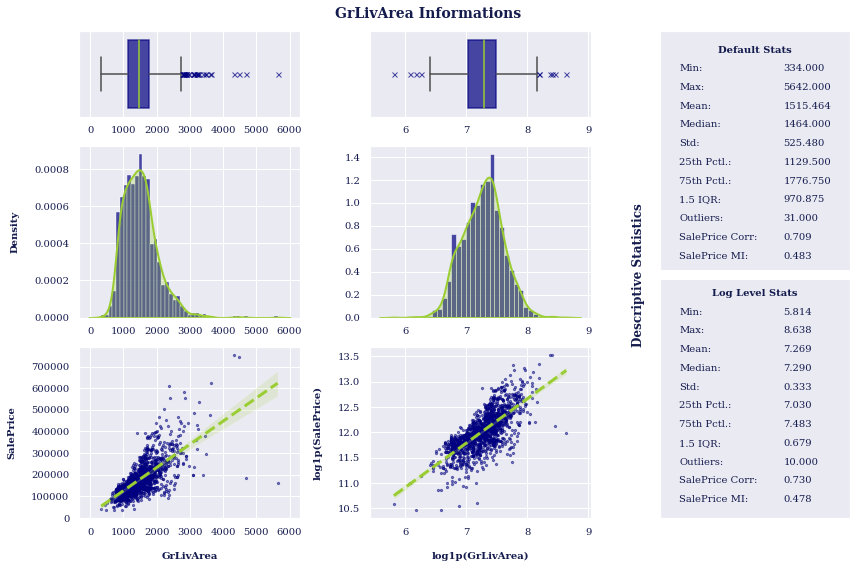

In [17]:
numerical_handler = NumericalFeatureHandler(train_set)
numerical_handler.numerical_info_plot("GrLivArea", "SalePrice")

## <b><span style="padding:15px; background-color:#0066CC; font-family: 'JetBrains Mono' ; font-weight: normal; color:#f2f2f0; border-radius: 10px 10px;"> 3. SALEPRICE PROBPLOTS </span></b>

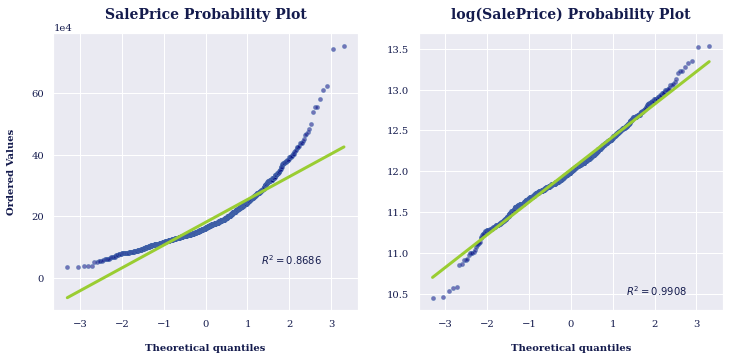

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

probplot(train_set["SalePrice"], plot=ax1, rvalue=True)
plt.sca(ax1)
plt.title("SalePrice Probability Plot")
plt.ticklabel_format(style="sci", axis="y", scilimits=(4, 4))

probplot(np.log(train_set["SalePrice"]), plot=ax2, rvalue=True)
plt.sca(ax2)
plt.ylabel("")
plt.title("log(SalePrice) Probability Plot")

# We need to do this by hand.
for ax in (ax1, ax2):
    ax.get_lines()[0].set_markerfacecolor("navy")
    ax.get_lines()[0].set_markersize(4.0)
    ax.get_lines()[0].set_alpha(0.5)
    ax.get_lines()[1].set_linewidth(3.0)
    ax.get_lines()[1].set_color("yellowgreen")

plt.show()

<p style="
    font-size: 20px;
    font-weight: bold;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #004C99;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#202020; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>In the case of the log transform, it looks very well. The points are arranged in a diagonal, so we can suspect that this distribution derives from the normal one. During training models, we will use log-level transformation for that.</li>
    <li>And that's it for now. In the next section, we will write custom transformers for preliminary preprocess datasets.</li>
</ul>
</blockquote>
